### HerbaLens Machine Learning Team

### Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Load Data

In [2]:
data_dir = "/content/drive/MyDrive/ML HerbaLens/dataset_tanaman_obat"

In [3]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3204 files belonging to 36 classes.


### Preprocess Data

In [4]:
data = data.map(lambda x,y: ((x/255, y)))

Karena make data pipeline, kode diatas berfungsi agar data langsung ke scale pas ke load

In [5]:
scaled_iterator = data.as_numpy_iterator()

In [6]:
batch = scaled_iterator.next()

In [7]:
batch[0].max()

1.0

In [8]:
batch[0].shape

(32, 256, 256, 3)

batch size = 32 dan input size (256, 256) udah default dari function image_dataset_from_directory

In [9]:
batch[1]

array([20, 27, 18, 26,  6, 27,  9, 33, 32, 13, 11, 31, 31, 13, 26,  9, 12,
       27, 27, 33, 26, 26, 15, 26, 27, 15, 13,  5, 11,  3, 22, 14],
      dtype=int32)

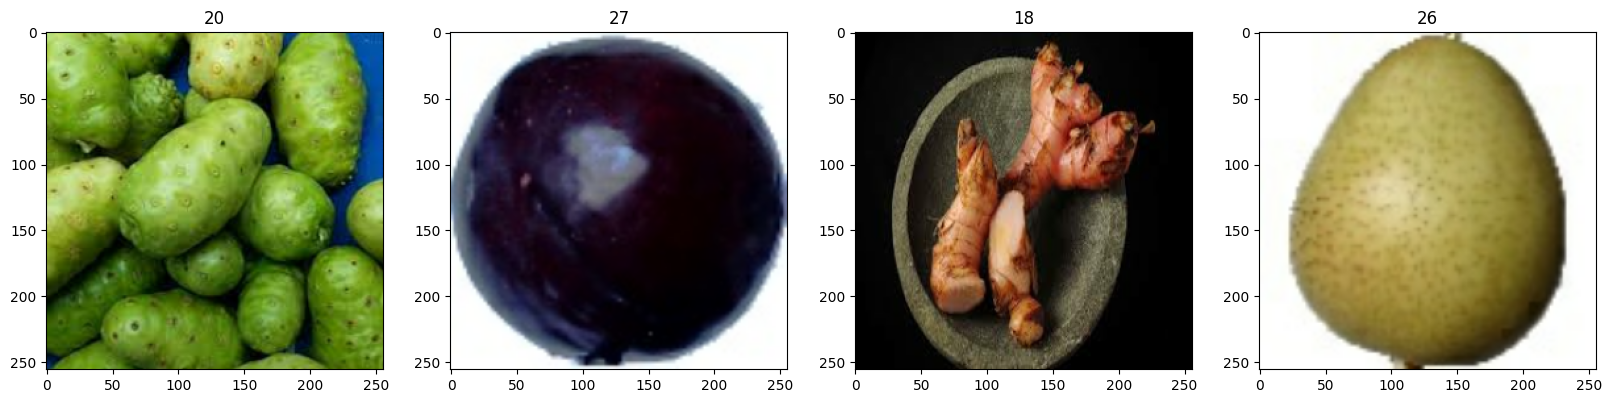

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

representasi dari label, contohnya 0 = alang-alang berdasarkan urutan directory. *data keacak karena default shuffle = true dari function image_dataset_from_directory

### Split Data

In [11]:
len(data)

101

In [12]:
train_size = int(len(data)*.7) # data to train model
val_size = int(len(data)*.2) # data to tune model while training
test_size = int(len(data)*.1)+1 # unseen data to test model

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### Inception V3 Transfer Learning

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [15]:
inception = InceptionV3(input_shape = (256, 256, 3),
                                  include_top = False, 
                                  weights='imagenet')

87910968/87910968 [==============================] - 1s 0us/step


In [16]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [17]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [18]:
prediction = Dense(len(data), activation='softmax')(x)

### Build Model

In [19]:
from tensorflow.keras.models import Model

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [20]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)